# House Prices

## 1- Modelo Conceitual

Introdução:
Neste trabalho utilizaremos técnicas de rede neurais para prever o preço das casas através da base de dados house_prices. No campo da inteligência artificial, as redes neurais vêm desempenhando um papel fundamental na resolução de problemas complexos, tendo a vantagem de aprendizagem de padrões complexos e de lidar com relações não lineares.
A determinação do preço das casas é influenciada por uma série de fatores que refletem tanto as características físicas da propriedade quanto o contexto do mercado imobiliário. <p>
A localização Geográfica (proximidade de centros urbanos, de escolas, acessibilidade a serviços e comodidades), tamanho e Layout da Casa (área construída, número de quartos, banheiros e andares), estado de conservação, idade da propriedade, possuir ou não piscina, jardins, varandas, garagem, e outros recursos especiais e a qualidade dos acabamentos influenciam o preço das propriedades. <p>
Além das características do imóvel, a dinâmica do mercado imobiliário também pode influenciar no preço, as condições do Mercado Imobiliário ( oferta e demanda no mercado imobiliário local), tendências econômicas, como taxas de juros, inflação e condições gerais do mercado imobiliário, podem impactar os preços.



Implementação: <p>
1) Objetivos:
Construir um modelo para prever o preço das casas usando o conjunto de dados de treinamento e então avaliar seu desempenho no conjunto de dados de teste.

2) Tarefas
Pré-processamento de Dados
Verificar existência de dados faltantes, e efetuar o tratamento, se necessário.
Codificar variáveis categóricas
Garantir que todas as variáveis estejam na mesma escala para facilitar o treinamento da rede neural, atraves de padronização.

Divisão dos dados
Os dados já se encontram previamente divididos em treino e teste

3) Método
Redes Neurais com cross validation

4) Requisitos
Computador com python


## 2- Construção de variáveis

In [231]:
# Importação das bibliotecas
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder


import os
import sys
#import re
import time
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline


import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary
%load_ext tensorboard

from google.protobuf import struct_pb2


import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # show only two digits
pd.set_option('display.max_columns', 100) # show up to 100 columns
np.random.seed(2023)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Vamos iniciar com a importação das bases de treino ('train') e teste ('test')

In [232]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [233]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Verificando o tamanho das bases

In [234]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Utilizando a coluna Id como índice

In [235]:
train.set_index("Id", inplace=True)
test.set_index("Id", inplace=True)

Vamos olhar as informações iniciais da base treino, para verificar tipo de variáveis e valores faltantes

In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Nossa base possui 1460 instancias e 80 categorias, sendo que 38 são numéricas e 43 categóricas.

Alguns atributos possuem valores NA, que significa que não possuem o atributo, mas o python assumiu como dados faltantes, então vamos imputar o valo "None" nas variáveis categóricas e zero nas variáveis numéricas. Falemos essa operação na base treino e na base teste, tomando o cuidado de utilizar a mediana calculada na base treino, na base de teste.

In [237]:
# Calculando a mediana nas variáveis numéricas na base de treino
median_values = train.select_dtypes(exclude=['object']).median()

# Imputando a mediana nas variáveis numéricas em train, mantendo o índice
dados_numerical = train.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em train, mantendo o índice
dados_categoric = train.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados, garantindo a ordem original das linhas
# Aqui, você não precisa fazer um merge já que você está tratando separadamente e quer combinar de volta
train = pd.concat([dados_numerical, dados_categoric], axis=1)

# Imputando a mediana nas variáveis numéricas em test com a mediana de train
dados_numerical_test = test.select_dtypes(exclude=['object']).fillna(median_values)

# Tratamento das variáveis categóricas em test, mantendo o índice
dados_categoric_test = test.select_dtypes(include=['object']).fillna('NONE')

# Combina os dados numéricos e categóricos tratados de test, garantindo a ordem original das linhas
test = pd.concat([dados_numerical_test, dados_categoric_test], axis=1)


In [238]:
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)


In [239]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath  

Das 80 variáveis, vamos selecionar as que acreditamos poder influenciar o preço dos imóveis. Selecionamos inicialmente 52 variáveis, além da variável target 'sale_price'

In [240]:

variaveis = ("MSSubClass", "LotArea", "LotShape", "LandContour", "LotConfig", "LandSlope", "BldgType", "HouseStyle", "1stFlrSF", "2ndFlrSF", "BedroomAbvGr", "FullBath", "HalfBath", "Kitchen", "TotRmsAbvGrd", "Heating", "Electrical", "Utilities", "CentralAir", "YrSold", "SaleType", "SaleCondition", "MSZoning", "Neighborhood", "Condition1", "Condition2", "YearBuilt", "YearRemodAdd", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "HouseStyle", "KitchenQual", "BsmtQual", "BsmtCond", "HeatingQC", "FireplaceQu", "Functional", "GarageType", "GarageFinish", "GarageArea", "PoolArea", "Fence", "MiscFeature", "Fireplaces", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MiscFeature", "SalePrice")

dados_train = train[list(filter(lambda x: x in train.columns, variaveis))]
dados_test = test[list(filter(lambda x: x in test.columns, variaveis))]

In [241]:
train = dados_train
test = dados_test

# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 53)
Test dataset shape: (1459, 52)


Em seguida, faremos uma análisa das variáveis, para definir quais entrarão no nosso modelo

In [242]:
colunas = train.columns
colunas

Index(['MSSubClass', 'LotArea', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'BldgType', 'HouseStyle', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Heating',
       'Electrical', 'Utilities', 'CentralAir', 'YrSold', 'SaleType',
       'SaleCondition', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2',
       'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'ExterQual',
       'ExterCond', 'HouseStyle', 'KitchenQual', 'BsmtQual', 'BsmtCond',
       'HeatingQC', 'FireplaceQu', 'Functional', 'GarageType', 'GarageFinish',
       'GarageArea', 'PoolArea', 'Fence', 'MiscFeature', 'Fireplaces',
       'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscFeature', 'SalePrice'],
      dtype='object')

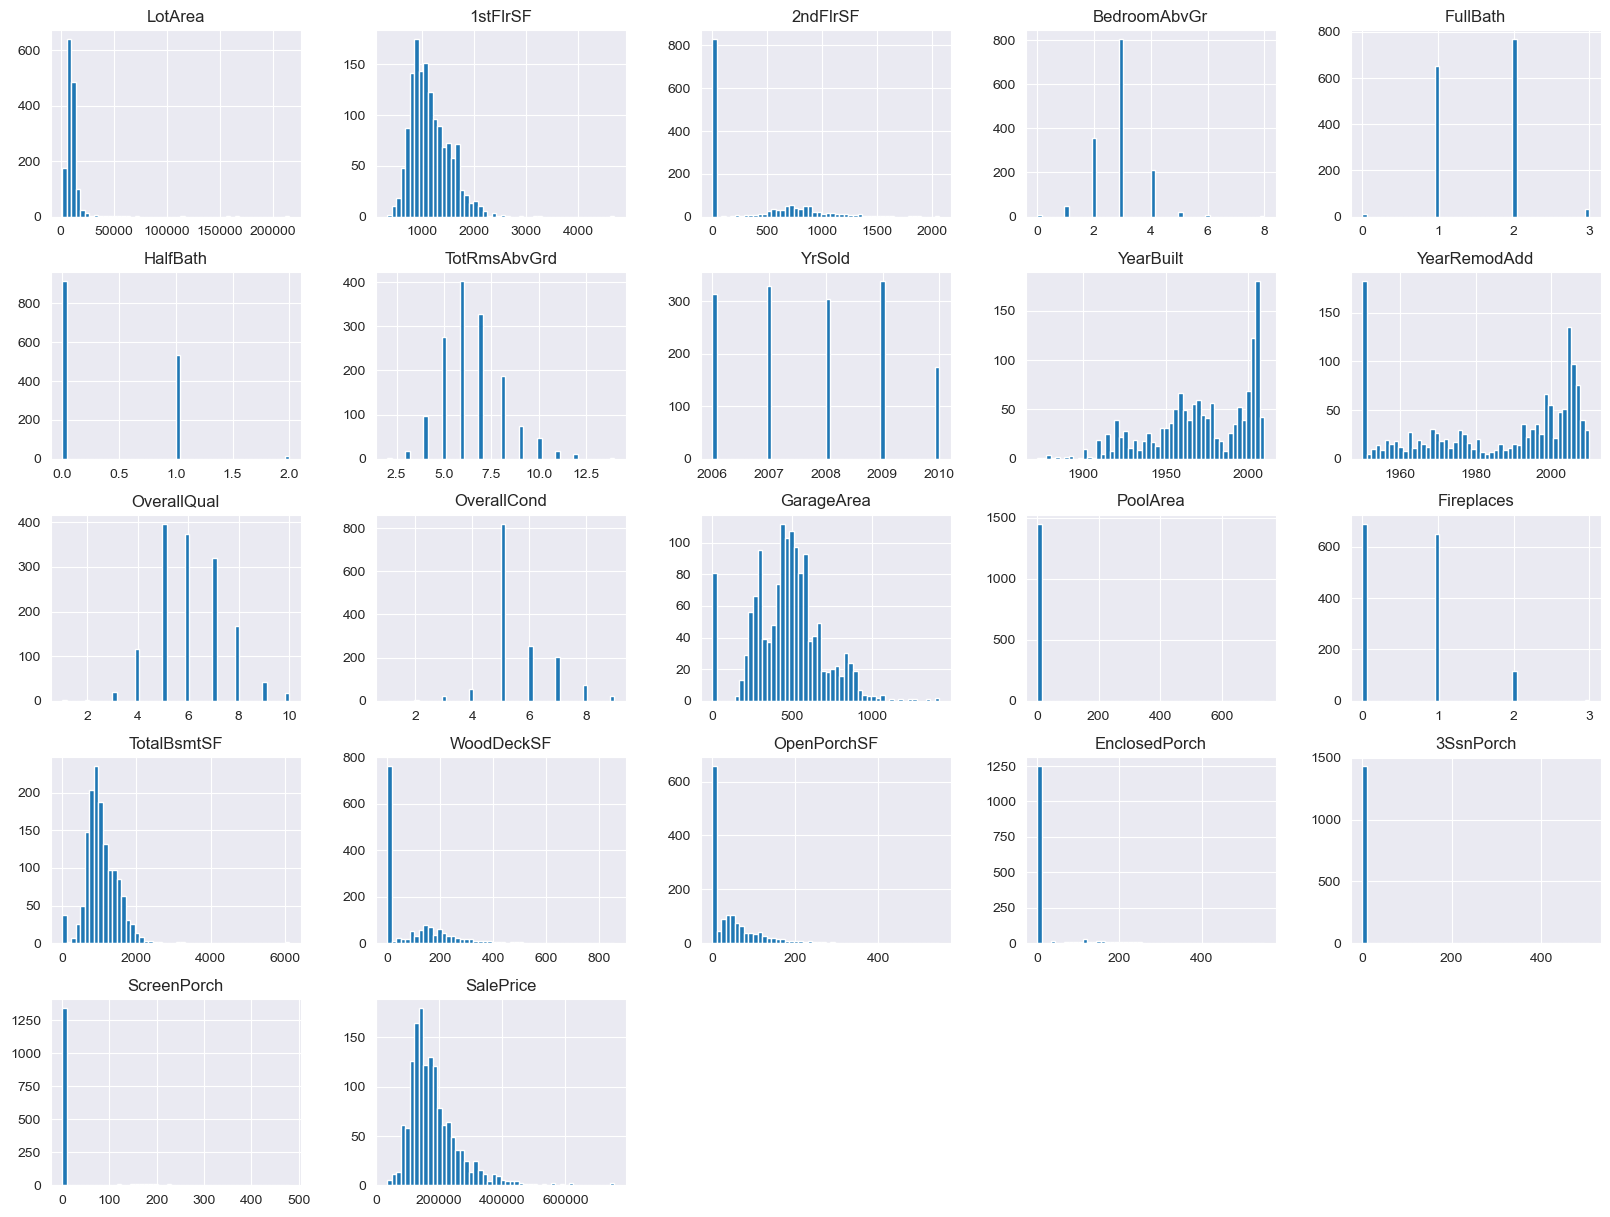

In [243]:
#%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize = (20,15))
plt.show()

Inicialmente vamos olhar as variáveis com uma correlação superior a 10%. Depois da etapa de tratamento dos dados, efetuaremos outros testes de seleção de variável.

In [244]:
print(train.shape)
print(test.shape)

(1460, 53)
(1459, 52)


## 3- Pré-processamento

In [245]:
test.head()

,MSSubClass,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,Heating,Electrical,Utilities,CentralAir,YrSold,SaleType,SaleCondition,MSZoning,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,OverallQual,OverallCond,ExterQual,ExterCond,HouseStyle,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional,GarageType,GarageFinish,GarageArea,PoolArea,Fence,MiscFeature,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,Reg,Lvl,Inside,Gtl,1Fam,1Story,896,0,2,1,0,5,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RH,NAmes,Feedr,Norm,1961,1961,5,6,TA,TA,1Story,TA,TA,TA,TA,NONE,Typ,Attchd,Unf,730.00,0,MnPrv,NONE,0,882.00,140,0,0,0,120,NONE
1462,20,14267,IR1,Lvl,Corner,Gtl,1Fam,1Story,1329,0,3,1,1,6,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,NAmes,Norm,Norm,1958,1958,6,6,TA,TA,1Story,Gd,TA,TA,TA,NONE,Typ,Attchd,Unf,312.00,0,NONE,Gar2,0,1329.00,393,36,0,0,0,Gar2
1463,60,13830,IR1,Lvl,Inside,Gtl,1Fam,2Story,928,701,3,2,1,6,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,Gilbert,Norm,Norm,1997,1998,5,5,TA,TA,2Story,TA,Gd,TA,Gd,TA,Typ,Attchd,Fin,482.00,0,MnPrv,NONE,1,928.00,212,34,0,0,0,NONE
1464,60,9978,IR1,Lvl,Inside,Gtl,1Fam,2Story,926,678,3,2,1,7,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,Gilbert,Norm,Norm,1998,1998,6,6,TA,TA,2Story,Gd,TA,TA,Ex,Gd,Typ,Attchd,Fin,470.00,0,NONE,NONE,1,926.00,360,36,0,0,0,NONE
1465,120,5005,IR1,HLS,Inside,Gtl,TwnhsE,1Story,1280,0,2,2,0,5,GasA,SBrkr,AllPub,Y,2010,WD,Normal,RL,StoneBr,Norm,Norm,1992,1992,8,5,Gd,TA,1Story,Gd,Gd,TA,Ex,NONE,Typ,Attchd,RFn,506.00,0,NONE,NONE,0,1280.00,0,82,0,0,144,NONE


In [246]:
cols = train.columns

Vamos separar as variáveis numéricas, categóricas ordinais e categóricas nominais para tratar adequadamenete

In [247]:
categoricas_nominais= ['MSSubClass', 'LotShape', 'LandContour',
 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','HouseStyle', 'Functional', 'GarageType', 'GarageFinish',
 'MiscFeature', 'SaleType', 'SaleCondition']

In [248]:
categoricas_ordinais1 = ['OverallQual', 'OverallCond']
categoricas_ordinais2 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Fence']


In [249]:
# codificando categoricas_ordinais1 da base treino
dados_ord1 = train[categoricas_ordinais1]
dados_ord1.index = range(1, len(train)+1)

# codificando categoricas_ordinais1 da base teste
dados_ord1_test = test[categoricas_ordinais1]
dados_ord1_test.index = range(1, len(test)+1)



In [250]:
print(dados_ord1.shape)
print(dados_ord1_test.shape)

(1460, 2)
(1459, 2)


In [251]:
# codificando categoricas_ordinais2 da base treino
from sklearn.preprocessing import LabelEncoder

dados_ord2 = train[categoricas_ordinais2]

# Mapeamento da ordem correta
ordem_correta = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'NA': 5}

# Criando um objeto para transformar as colunas categóricas usando LabelEncoder
cat_encoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna categórica
for coluna in dados_ord2.columns:
    dados_ord2[coluna] = dados_ord2[coluna].map(ordem_correta)
    dados_ord2[coluna] = cat_encoder.fit_transform(dados_ord2[coluna])

dados_ord2.index = range(1, len(train)+1)



In [252]:
# codificando categoricas_ordinais2 da base teste

dados_ord2_test = test[categoricas_ordinais2]

# Mapeamento da ordem correta
ordem_correta = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'NA': 5}

# Criando um objeto para transformar as colunas categóricas usando LabelEncoder
cat_encoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna categórica
for coluna in dados_ord2.columns:
    dados_ord2_test[coluna] = dados_ord2_test[coluna].map(ordem_correta)
    dados_ord2_test[coluna] = cat_encoder.fit_transform(dados_ord2_test[coluna])

dados_ord2_test.index = range(1, len(test)+1)

In [253]:
print(dados_ord1.shape)
print(dados_ord1_test.shape)

(1460, 2)
(1459, 2)


In [254]:
# Mostrando o resultado
print(dados_ord2_test)

      ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
1             2          2         2         1          2            2   
2             2          2         2         1          2            1   
3             2          2         1         1          1            2   
4             2          2         2         1          0            1   
5             1          2         1         1          0            1   
...         ...        ...       ...       ...        ...          ...   
1455          2          2         2         1          1            2   
1456          2          2         2         1          2            2   
1457          2          2         2         1          0            2   
1458          2          2         1         1          2            2   
1459          2          2         1         1          0            2   

      FireplaceQu  Fence  
1               5      0  
2               5      0  
3               2      0  
4  

In [255]:
categoricas_nominais

['MSSubClass',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'Functional',
 'GarageType',
 'GarageFinish',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [256]:
# Tratando variáveis nominais na base treino

dados_nom = train[categoricas_nominais]
dados_nom.head()

,MSSubClass,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,HouseStyle,Functional,GarageType,GarageFinish,MiscFeature,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,
1,60,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,2Story,Typ,Attchd,RFn,NONE,NONE,WD,Normal
2,20,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Story,1Story,Typ,Attchd,RFn,NONE,NONE,WD,Normal
3,60,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,2Story,Typ,Attchd,RFn,NONE,NONE,WD,Normal
4,70,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2Story,2Story,Typ,Detchd,Unf,NONE,NONE,WD,Abnorml
5,60,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,2Story,2Story,Typ,Attchd,RFn,NONE,NONE,WD,Normal


In [257]:
# Tratando variáveis nominais na base treino
dados_nom_test = test[categoricas_nominais]
dados_nom_test.head()

,MSSubClass,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,HouseStyle,Functional,GarageType,GarageFinish,MiscFeature,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,
1461,20,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Story,1Story,Typ,Attchd,Unf,NONE,NONE,WD,Normal
1462,20,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Story,1Story,Typ,Attchd,Unf,Gar2,Gar2,WD,Normal
1463,60,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2Story,2Story,Typ,Attchd,Fin,NONE,NONE,WD,Normal
1464,60,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2Story,2Story,Typ,Attchd,Fin,NONE,NONE,WD,Normal
1465,120,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Story,1Story,Typ,Attchd,RFn,NONE,NONE,WD,Normal


In [258]:
dados_nom = dados_nom.T.drop_duplicates().T
dados_nom_test = dados_nom_test.T.drop_duplicates().T


In [259]:
dados_nom_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   object
 1   LotShape       1459 non-null   object
 2   LandContour    1459 non-null   object
 3   Utilities      1459 non-null   object
 4   LotConfig      1459 non-null   object
 5   LandSlope      1459 non-null   object
 6   Neighborhood   1459 non-null   object
 7   Condition1     1459 non-null   object
 8   Condition2     1459 non-null   object
 9   HouseStyle     1459 non-null   object
 10  Functional     1459 non-null   object
 11  GarageType     1459 non-null   object
 12  GarageFinish   1459 non-null   object
 13  MiscFeature    1459 non-null   object
 14  SaleType       1459 non-null   object
 15  SaleCondition  1459 non-null   object
dtypes: object(16)
memory usage: 226.1+ KB


In [260]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dados_nom_test.columns:
    print('{} : {}'.format(col, dados_nom_test[col].unique()))

MSSubClass : ['20' '60' '120' '160' '80' '30' '50' '90' '85' '190' '45' '70' '75' '180'
 '40' '150']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NONE']
LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
HouseStyle : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
Functional : ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' 'NONE']
GarageType : ['Attchd' 'Detchd' 'BuiltIn' 'NONE' 'Basment' '2Types' 'CarPort']
GarageFinish : ['Unf' 'Fin' 'RFn' 'NONE']
MiscFeature : ['NONE' 'Gar2' 'Shed' 'Othr']
Sa

In [261]:
#treino
# Criar um objeto OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Aplicar o OneHotEncoder nas colunas categóricas nominais
dados_categoricas_nominais_one_hot_encoded = onehot_encoder.fit_transform(train[categoricas_nominais])

# Obter os nomes das colunas a partir do objeto OneHotEncoder
colunas = onehot_encoder.get_feature_names_out()

# Transformar o objeto numpy.ndarray em um DataFrame
dados_nom = pd.DataFrame(dados_categoricas_nominais_one_hot_encoded, columns=colunas)

dados_nom.index = range(1, len(train)+1)

dados_nom

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [262]:

#treino
# Criar um objeto OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Aplicar o OneHotEncoder nas colunas categóricas nominais
dados_categoricas_nominais_one_hot_encoded_test = onehot_encoder.fit_transform(test[categoricas_nominais])

# Obter os nomes das colunas a partir do objeto OneHotEncoder
colunas = onehot_encoder.get_feature_names_out()

# Transformar o objeto numpy.ndarray em um DataFrame
dados_nom_test = pd.DataFrame(dados_categoricas_nominais_one_hot_encoded_test, columns=colunas)

dados_nom_test.index = range(1, len(test)+1)

dados_nom_test

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NONE,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,Condition2_PosA,Condition2_PosN,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_NONE,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_NONE,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.0

In [263]:
print(dados_nom.shape)
print(dados_nom_test.shape)

(1460, 116)
(1459, 112)


In [264]:
def encontrar_colunas_diferentes(df1, df2):
    colunas_df1 = set(df1.columns)
    colunas_df2 = set(df2.columns)
    
    colunas_diferentes = colunas_df1.symmetric_difference(colunas_df2)
    
    return colunas_diferentes
colunas_diferentes = encontrar_colunas_diferentes(dados_nom, dados_nom_test)

print("Colunas diferentes nos dois DataFrames:")
print(colunas_diferentes)

Colunas diferentes nos dois DataFrames:
{'SaleType_NONE', 'Condition2_RRAn', 'Functional_NONE', 'MSSubClass_150', 'Utilities_NoSeWa', 'Condition2_RRAe', 'MiscFeature_TenC', 'HouseStyle_2.5Fin', 'Utilities_NONE', 'Condition2_RRNn'}


In [265]:
colunas_diferentes

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Functional_NONE',
 'HouseStyle_2.5Fin',
 'MSSubClass_150',
 'MiscFeature_TenC',
 'SaleType_NONE',
 'Utilities_NONE',
 'Utilities_NoSeWa'}

In [266]:
dummy_names = dados_nom.columns.tolist()
dummy_names_test = dados_nom_test.columns.tolist()

# Printing the column names
print(dummy_names)

['MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Nei

In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   LotArea        1460 non-null   int64 
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   LandSlope      1460 non-null   object
 6   BldgType       1460 non-null   object
 7   HouseStyle     1460 non-null   object
 8   1stFlrSF       1460 non-null   int64 
 9   2ndFlrSF       1460 non-null   int64 
 10  BedroomAbvGr   1460 non-null   int64 
 11  FullBath       1460 non-null   int64 
 12  HalfBath       1460 non-null   int64 
 13  TotRmsAbvGrd   1460 non-null   int64 
 14  Heating        1460 non-null   object
 15  Electrical     1460 non-null   object
 16  Utilities      1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  YrSold         1460 non-null   in

Padronizando as variáveis numéricas 

In [268]:
# Standardizar
#treino
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data = train.apply(normalize_column)

#test
def normalize_column(col):
    return (col - col.mean()) / col.std() if col.dtype in ['int64', 'float64','int32'] else col

# Apply the function to each column
normalized_data_test = test.apply(normalize_column)

# Viewing the resulting DataFrame
normalized_data.head()

,MSSubClass,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,HouseStyle,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,Heating,Electrical,Utilities,CentralAir,YrSold,SaleType,SaleCondition,MSZoning,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,OverallQual,OverallCond,ExterQual,ExterCond,HouseStyle,KitchenQual,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,Functional,GarageType,GarageFinish,GarageArea,PoolArea,Fence,MiscFeature,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscFeature,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,-0.21,Reg,Lvl,Inside,Gtl,1Fam,2Story,-0.79,1.16,0.16,0.79,1.23,0.91,GasA,SBrkr,AllPub,Y,0.14,WD,Normal,RL,CollgCr,Norm,Norm,1.05,0.88,0.65,-0.52,Gd,TA,2Story,Gd,Gd,TA,Ex,NONE,Typ,Attchd,RFn,0.35,-0.07,NONE,NONE,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,NONE,0.35
2,20,-0.09,Reg,Lvl,FR2,Gtl,1Fam,1Story,0.26,-0.79,0.16,0.79,-0.76,-0.32,GasA,SBrkr,AllPub,Y,-0.61,WD,Normal,RL,Veenker,Feedr,Norm,0.16,-0.43,-0.07,2.18,TA,TA,1Story,TA,Gd,TA,Ex,TA,Typ,Attchd,RFn,-0.06,-0.07,NONE,NONE,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,NONE,0.01
3,60,0.07,IR1,Lvl,Inside,Gtl,1Fam,2Story,-0.63,1.19,0.16,0.79,1.23,-0.32,GasA,SBrkr,AllPub,Y,0.14,WD,Normal,RL,CollgCr,Norm,Norm,0.98,0.83,0.65,-0.52,Gd,TA,2Story,Gd,Gd,TA,Ex,TA,Typ,Attchd,RFn,0.63,-0.07,NONE,NONE,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,NONE,0.54
4,70,-0.10,IR1,Lvl,Corner,Gtl,1Fam,2Story,-0.52,0.94,0.16,-1.03,-0.76,0.30,GasA,SBrkr,AllPub,Y,-1.37,WD,Abnorml,RL,Crawfor,Norm,Norm,-1.86,-0.72,0.65,-0.52,TA,TA,2Story,Gd,TA,Gd,Gd,Gd,Typ,Detchd,Unf,0.79,-0.07,NONE,NONE,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,NONE,-0.52
5,60,0.38,IR1,Lvl,FR2,Gtl,1Fam,2Story,-0.05,1.62,1.39,0.79,1.23,1.53,GasA,SBrkr,AllPub,Y,0.14,WD,Normal,RL,NoRidge,Norm,Norm,0.95,0.73,1.37,-0.52,Gd,TA,2Story,Gd,Gd,TA,Ex,TA,Typ,Attchd,RFn,1.70,-0.07,NONE,NONE,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,NONE,0.87


In [269]:
print(normalized_data.shape)
print(normalized_data_test.shape)

(1460, 53)
(1459, 52)


In [270]:

dados_numericos_padronizados = normalized_data.select_dtypes(exclude=['object'])

dados_numericos_padronizados_test = normalized_data_test.select_dtypes(exclude=['object'])


dados_numericos_padronizados.index = range(1, len(train)+1)
dados_numericos_padronizados_test.index = range(1, len(test)+1)

In [271]:
print(dados_numericos_padronizados.shape)
print(dados_numericos_padronizados_test.shape)

(1460, 22)
(1459, 21)


In [272]:
# Juntando as tabelas

train = pd.concat([dados_numericos_padronizados, dados_nom, dados_ord1, dados_ord2], axis=1)

test = pd.concat([dados_numericos_padronizados_test, dados_nom_test, dados_ord1_test, dados_ord2_test], axis=1)


In [273]:
train.head()

,LotArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YrSold,YearBuilt,YearRemodAdd,OverallQual,OverallCond,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,Fence
1,-0.21,-0.79,1.16,0.16,0.79,1.23,0.91,0.14,1.05,0.88,0.65,-0.52,0.35,-0.07,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,7,5,1,2,1,1,0,1,5,0
2,-0.09,0.26,-0.79,0.16,0.79,-0.76,-0.32,-0.61,0.16,-0.43,-0.07,2.18,-0.06,-0.07,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,0.01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,6,8,2,2,1,1,0,2,2,0
3,0.07,-0.63,1.19,0.16,0.79,1.23,-0.32,0.14,0.98,0.83,0.65,-0.52,0.63,-0.07,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,7,5,1,2,1,1,0,1,2,0
4,-0.10,-0.52,0.94,0.16,-1.03,-0.76,0.30,-1.37,-1.86,-0.72,0.65,-0.52,0.79,-0.07,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,-0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,7,5,2,2,2,0,1,1,1,0
5,0.38,-0.05,1.62,1.39,0.79,1.23,1.53,0.14,0.95,0.73,1.37,-0.52,1.70,-0.07,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,0.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,8,5,1,2,1,1,0,1,2,0


In [274]:
# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 148)
Test dataset shape: (1459, 143)


In [275]:
#train= train.drop(columns="MSSubClass")
#test= test.drop(columns="MSSubClass")

Vamos fazer o test VIF, para isso, vamos separar uma base de dados sem as variáveis dummies e sem a variável alvo

In [276]:
df_first_19 = train.iloc[:, :21].copy()
df_last_10 = train.iloc[:, -10:].copy()

save_my_sale = train.iloc[:, 21].copy()

#my_template = train
train_SD = pd.concat([df_first_19, df_last_10], axis=1)

In [277]:
print(save_my_sale)
#print(dados)


1       0.35
2       0.01
3       0.54
4      -0.52
5       0.87
        ... 
1456   -0.07
1457    0.37
1458    1.08
1459   -0.49
1460   -0.42
Name: SalePrice, Length: 1460, dtype: float64


In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_vars = train_SD

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]


In [279]:
print(vif_data)

         Variable  VIF
0         LotArea 1.20
1        1stFlrSF 6.80
2        2ndFlrSF 5.31
3    BedroomAbvGr 2.32
4        FullBath 2.68
5        HalfBath 2.17
6    TotRmsAbvGrd 4.42
7          YrSold 1.03
8       YearBuilt 4.19
9    YearRemodAdd 2.58
10    OverallQual  inf
11    OverallCond  inf
12     GarageArea 1.83
13       PoolArea 1.08
14     Fireplaces 4.56
15    TotalBsmtSF 5.58
16     WoodDeckSF 1.19
17    OpenPorchSF 1.21
18  EnclosedPorch 1.28
19      3SsnPorch 1.02
20    ScreenPorch 1.10
21    OverallQual  inf
22    OverallCond  inf
23      ExterQual 3.06
24      ExterCond 1.22
25       BsmtQual 3.74
26       BsmtCond 2.09
27      HeatingQC 1.65
28    KitchenQual 2.68
29    FireplaceQu 4.68
30          Fence  NaN


In [280]:
max_value = vif_data['VIF'].max()

print(f"The maximum value in the column is: {max_value}")

The maximum value in the column is: inf


In [281]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Columns: 148 entries, LotArea to Fence
dtypes: float64(138), int64(10)
memory usage: 1.6 MB


In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'train' is your DataFrame containing predictor variables initially
independent_vars = train_SD.copy()  # Make a copy to avoid modifying the original DataFrame

high_vif_variables = pd.DataFrame({'Variable': [], 'VIF': []})

while True:
    vif_data = pd.DataFrame()
    vif_data["Variable"] = independent_vars.columns
    vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

    high_vif_variables = vif_data[vif_data['VIF'] > 2]

    if high_vif_variables.empty:
        break

    variable_to_drop = high_vif_variables.loc[high_vif_variables['VIF'].idxmax(), 'Variable']

    independent_vars.drop(variable_to_drop, axis=1, inplace=True)

print("Variables after dropping high VIF variables:")
print(independent_vars.columns)


Variables after dropping high VIF variables:
Index(['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YrSold',
       'YearRemodAdd', 'GarageArea', 'PoolArea', 'Fireplaces', 'TotalBsmtSF',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'BsmtCond', 'Fence'],
      dtype='object')


In [283]:
column_names2 = independent_vars.columns.tolist()

# Printing the column names
print(column_names2)

['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YrSold', 'YearRemodAdd', 'GarageArea', 'PoolArea', 'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtCond', 'Fence']


In [284]:
independent_vars.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,YrSold,YearRemodAdd,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtCond,Fence
1,-0.21,0.16,0.79,1.23,0.14,0.88,0.35,-0.07,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,1,0
2,-0.09,0.16,0.79,-0.76,-0.61,-0.43,-0.06,-0.07,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,1,0
3,0.07,0.16,0.79,1.23,0.14,0.83,0.63,-0.07,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,1,0
4,-0.10,0.16,-1.03,-0.76,-1.37,-0.72,0.79,-0.07,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,0,0
5,0.38,1.39,0.79,1.23,0.14,0.73,1.70,-0.07,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,1,0


In [285]:
#excluindo Fence
dados2 = independent_vars.iloc[:, :-1]
dados2.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,YrSold,YearRemodAdd,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtCond
1,-0.21,0.16,0.79,1.23,0.14,0.88,0.35,-0.07,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,1
2,-0.09,0.16,0.79,-0.76,-0.61,-0.43,-0.06,-0.07,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,1
3,0.07,0.16,0.79,1.23,0.14,0.83,0.63,-0.07,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,1
4,-0.10,0.16,-1.03,-0.76,-1.37,-0.72,0.79,-0.07,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,0
5,0.38,1.39,0.79,1.23,0.14,0.73,1.70,-0.07,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,1


In [286]:
#Juntando as variáveis selecionadas pelo VIF com as dummies
dados1 = train[dummy_names]
#dados2 = train[column_names2]


In [287]:
dados3 = pd.concat([dados2, dados1], axis=1)
#dados3 = pd.concat([dados2], axis=1)
dados3.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,YrSold,YearRemodAdd,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,HouseStyle_2Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,-0.21,0.16,0.79,1.23,0.14,0.88,0.35,-0.07,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,-0.09,0.16,0.79,-0.76,-0.61,-0.43,-0.06,-0.07,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,0.07,0.16,0.79,1.23,0.14,0.83,0.63,-0.07,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,-0.10,0.16,-1.03,-0.76,-1.37,-0.72,0.79,-0.07,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
5,0.38,1.39,0.79,1.23,0.14,0.73,1.70,-0.07,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00

In [288]:
dados3.shape

(1460, 154)

In [289]:
my_df = pd.DataFrame(save_my_sale)
my_df.head()

,SalePrice
1,0.35
2,0.01
3,0.54
4,-0.52
5,0.87


In [290]:
#Juntando a variável alvo com a base
dados3 = pd.concat([dados3, my_df], axis=1)

In [291]:
dados3.head()

,LotArea,BedroomAbvGr,FullBath,HalfBath,YrSold,YearRemodAdd,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1,-0.21,0.16,0.79,1.23,0.14,0.88,0.35,-0.07,-0.95,-0.46,-0.75,0.22,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.35
2,-0.09,0.16,0.79,-0.76,-0.61,-0.43,-0.06,-0.07,0.60,0.47,1.63,-0.70,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01
3,0.07,0.16,0.79,1.23,0.14,0.83,0.63,-0.07,0.60,-0.31,-0.75,-0.07,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.54
4,-0.10,0.16,-1.03,-0.76,-1.37,-0.72,0.79,-0.07,0.60,-0.69,-0.75,-0.18,4.09,-0.12,-0.27,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.52
5,0.38,1.39,0.79,1.23,0.14,0.73,1.70,-0.07,0.60,0.20,0.78,0.56,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1

In [292]:
dados3.tail()

,LotArea,BedroomAbvGr,FullBath,HalfBath,YrSold,YearRemodAdd,GarageArea,PoolArea,Fireplaces,TotalBsmtSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_SLvl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NONE,GarageFinish_NONE,GarageFinish_RFn,GarageFinish_Unf,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,MiscFeature_NONE,MiscFeature_NONE,MiscFeature_Othr,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1456,-0.26,0.16,0.79,1.23,-0.61,0.73,-0.06,-0.07,0.60,-0.24,-0.75,-0.10,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,-0.07
1457,0.27,0.16,0.79,-0.76,1.64,0.15,0.13,-0.07,2.15,1.10,2.03,-0.70,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.37
1458,-0.15,1.39,0.79,-0.76,1.64,1.02,-1.03,-0.07,2.15,0.22,-0.75,0.20,-0.36,-0.12,-0.27,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.08
1459,-0.08,-1.06,-1.03,-0.76,1.64,0.54,-1.09,-0.07,-0.95,0.05,2.17,-0.70,1.47,-0.12,-0.27,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,-0.49
1460,-0.06,0.16,-1.03,1.23,0.14,-0.96,-0.92,-0.07,-0.95,0.45,5.12,0.32,-0.36,-0.12,-0.27,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.

In [293]:
#Verificar se ficol algum valor ausente
columns_with_nan = dados3.columns[dados3.isnull().any()].tolist()

print("Columns containing NaN values:")
print(columns_with_nan)

Columns containing NaN values:
[]


In [294]:
#redefinando o nome train para a base de treino com as variáveis selecionadas
train = dados3  # Filter rows where 'id' is from 1 to 1460

# Displaying the shapes of the new datasets
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 155)
Test dataset shape: (1459, 143)


#### Vamos fazer uma seleção de variáveis com o modelo lasso

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Separar variáveis independentes (X) e variável dependente (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Ajustar um modelo Lasso
lasso = Lasso(alpha=0.009)  # O valor de alpha controla a força da penalidade L
lasso.fit(X_train, y_train)

# Verificar os coeficientes não nulos (variáveis selecionadas)
variaveis_selecionadas = X.columns[lasso.coef_ != 0]

# Exibir as variáveis selecionadas
print("Variáveis selecionadas pelo Lasso:", variaveis_selecionadas)


Variáveis selecionadas pelo Lasso: Index(['LotArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearRemodAdd',
       'GarageArea', 'Fireplaces', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass_160',
       'MSSubClass_60', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'HouseStyle_1Story', 'HouseStyle_1Story', 'HouseStyle_1Story',
       'HouseStyle_1Story', 'Functional_Typ', 'GarageType_BuiltIn',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_New', 'SaleType_WD'],
      dtype='object')


## 4- Aplicando o modelo

In [334]:
# Separando a variável dependente e independnte
#X = train.drop('SalePrice', axis=1)

X = train[variaveis_selecionadas]
y = train['SalePrice']

#X_test = test
#X_test = test[variaveis_selecionadas]
#y_test = test['SalePrice']  # Variável dependente


In [338]:
X.shape

(1460, 48)

## Rede Neural Sem Cross Validation

In [335]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


# Inicializando e treinando o MLPRegressor
ANN = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2024)
ANN.fit(X_train, y_train)

# Fazendo previsões
y_pred = ANN.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.16378951308103762
R² Score: 0.8448670488037993


#### Testando um rede profunda

In [350]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir o modelo de rede neural profunda com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Camada de dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Camada de dropout
    tf.keras.layers.Dense(1)  # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Fazer previsões
y_pred = model.predict(X_test_scaled).flatten()

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')



10/10 [==============================] - 0s 2ms/step
Mean Squared Error: 0.17548690278466234
R² Score: 0.8337878865797957


## Com Cross Validation

In [301]:
import numpy as np
from itertools import product
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


# Definindo o menu de ajuste de hiperparâmetros
first_layer_neurons = np.arange(7, 10, 1)
second_layer_neurons = np.arange(3, 7, 1)
third_layer_neurons = np.arange(3, 6, 1)
# [(7, 4, 3), (7, 4, 4), ..., (9, 6, 5)]
distributions = {'hidden_layer_sizes': list(product(first_layer_neurons, second_layer_neurons, third_layer_neurons)),
                 'activation': ['relu', 'identity', 'logistic', 'tanh'],
                 'alpha': [0.0001, 0.001, 0.01, 0.1]}

# Inicializando o MLPRegressor
ANN = MLPRegressor()

# Inicializando a busca em grade
grid_search = GridSearchCV(ANN, distributions, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizando a busca em grade
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros
best_params = grid_search.best_params_
print(f"Melhores Parâmetros: {best_params}")

# Fazendo previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Avaliando o desempenho usando MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio no Conjunto de Teste: {mse}")
# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Melhores Parâmetros: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (8, 6, 5)}
Erro Quadrático Médio no Conjunto de Teste: 0.1971806155855893
R² Score: 0.8132407243964299


In [351]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')

# Se quiser, também pode visualizar as previsões em comparação com os rótulos reais
resultados = pd.DataFrame({'Rótulos Reais': y_test, 'Previsões': previsoes})
print('\nResultados:\n', resultados)

Erro Médio Quadrático (MSE): 0.15
R²: 0.85

Resultados:
       Rótulos Reais  Previsões
86             1.00       0.80
227            1.37       1.38
492           -0.60      -0.72
64            -0.52      -0.88
576           -0.79      -0.98
...             ...        ...
1271           1.00       0.02
903           -0.01       0.00
1019          -0.26      -0.12
312           -0.62      -0.65
1056          -0.01      -0.26

[292 rows x 2 columns]


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


## Modelo 2- Só com base de treino

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separar variáveis independentes (X) e variável dependente (y)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)



In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializando e treinando o MLPRegressor
ANN = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2023)
ANN.fit(X_train, y_train)

# Fazendo previsões
y_pred = ANN.predict(X_test)

# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando o coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score## Comparando com Randon Forest

# Criar um modelo de Random Forest Regressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
previsoes = modelo_rf.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


## Conclusão

Gravando o arquivo de submissão

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Supondo que você já tenha treinado seu modelo MLPRegressor e obteve as previsões em y_pred
# Também assumindo que você tem um DataFrame 'test_data' contendo a coluna 'ID' e as features

# Dividindo os dados em conjunto de treino e teste (se ainda não foram divididos)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Inicializando e treinando o MLPRegressor (substitua esta parte com o treinamento real do seu modelo)
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', random_state=2023)
# mlp_regressor.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
# y_pred = mlp_regressor.predict(X_test)

# Criando um DataFrame com ID e previsões
resultado_df = pd.DataFrame({'ID': test_data['ID'], 'Previsoes': y_pred})

# Salvando o DataFrame em um arquivo CSV
resultado_df.to_csv('previsoes.csv', index=False)
